In [1]:
import os
import datetime
import time
import matplotlib.pyplot as plt


In [2]:

list_time=[]
list_ram=[]

In [3]:
list_file=[]
list_label=[]
#list_file.append('run-cdhit-sp60-i70.txt')
#list_file.append('run-mm-cluster-sp60-i70.txt')
#list_file.append('run-mm-linclust-sp60-i70.txt')
#list_file.append('run-diamond-cluster-sp60-i70.txt')
#list_file.append('run-diamond-lincluster-sp60-i70.txt')
#list_file.append('run-mm-linclust-sp600-i70.txt')
#list_file.append('run-diamond-lincluster-sp600-i70.txt')
#list_file.append('run-diamond-deepcluster-sp600-i70.txt')
#list_file.append('run-pan-sp60.txt')
#list_label.append('pan sp60')
#replace cdhit -> mmseq lincluster
#list_file.append('run-pan-mmseq-lincluster-sp60.txt')
#list_label.append('pan mmseq lincluster sp60')
#list_file.append('run-pan-diamond-linclust-nogroup-sp60.txt')
#list_label.append('pan diamond lincluster nogroup sp60')
#list_file.append('run-pan-sp600.txt')
#list_label.append('panta sp600')
#list_file.append('run-pan-diamond-linclust-nogroup-sp600.txt')
#list_label.append('an diamond lincluster nogroup sp600')
#list_file.append('run-a_diamond_c_mcl-sp600.txt')
list_file.append('run-g_cdhit_a_diamond_c_mcl-sp600.txt')
list_file.append('run-g_diamond_a_diamond_c_mcl-sp600.txt')
list_file.append('run-g_mmseq_a_diamond_c_mcl-sp600.txt')
list_file.append('run-c_mmseq-sp600.txt')
list_file.append('run-c_diamond-sp600.txt')

In [4]:
#parse result text files:

def parseResultFile(text_file):
    time_duration=0
    ram_maximum=0
    file1 = open(text_file, 'r')
    lines = file1.readlines()
    
    for line in lines:

        if line.strip().startswith('Elapsed (wall clock) time (h:mm:ss or m:ss):'):
            time_str=line.replace('Elapsed (wall clock) time (h:mm:ss or m:ss):','').strip()
            print(time_str)
            if time_str.count(':')>1:
                x = time.strptime(time_str.split('.')[0],'%H:%M:%S')
            else:
                x = time.strptime(time_str.split('.')[0],'%M:%S')
            time_duration=datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
        if line.strip().startswith('Maximum resident set size (kbytes):'):
            ram_str=line.replace('Maximum resident set size (kbytes):','').strip()
            ram_maximum=int(ram_str)
    return time_duration,ram_maximum

In [5]:
for f in list_file:
    t,r=parseResultFile(f)
    print(f+":"+str(t)+","+str(r))
    list_time.append(t)
    list_ram.append(r)
    

6:30.22
5:44.71
run-g_cdhit_a_diamond_c_mcl-sp600.txt:344.0,852564
17:25.12
24:30.83
run-g_diamond_a_diamond_c_mcl-sp600.txt:1470.0,3098576
5:20.36
5:19.89
run-g_mmseq_a_diamond_c_mcl-sp600.txt:319.0,1115312
3:03.85
3:26.93
run-c_mmseq-sp600.txt:206.0,1114224
4:45.25
run-c_diamond-sp600.txt:285.0,1714632


In [6]:
def plotData(data1,label, ylabel, title):
    
 
    # heights of bars
    height = data1
 
    # labels for bars
    tick_label = label
 
    # plotting a bar chart
    plt.bar(tick_label, height, color ='maroon', 
        width = 0.4)
 
    # naming the x-axis
    plt.xlabel('Runs')
    # naming the y-axis
    plt.ylabel(ylabel)
    # plot title
    plt.title(title)
 
    # function to show the plot
    plt.show()

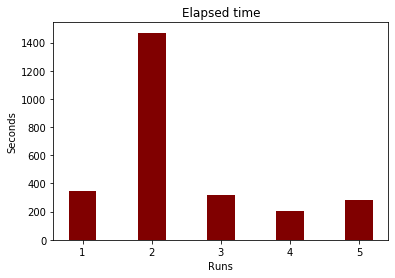

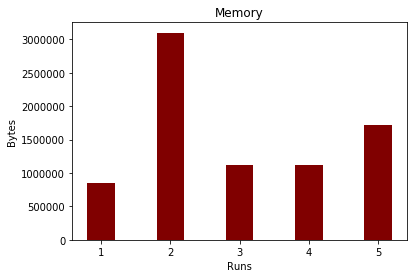

In [7]:
plotData(list_time,[1,2,3,4,5],"Seconds", "Elapsed time")
plotData(list_ram,[1,2,3,4,5],"Bytes", "Memory")